### N-Gram Character-Level Language Model
Following the [Andrej Karpathy's "Neural Networks: Zero to Hero" playlist](https://www.youtube.com/playlist?list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ) on YouTube.

In [1]:
names = open("data/names_3M_ARG.txt", encoding="utf-8").read().split("\n")[:10000]

chars = sorted(list(set("".join(names))))
stoi = {s: i + 1 for i, s in enumerate(chars)} # Encoder
stoi["?"] = 0 # start/end char
itos = {i: s for s, i in stoi.items()} # Decoder

print(stoi)

{' ': 1, 'A': 2, 'B': 3, 'C': 4, 'D': 5, 'E': 6, 'F': 7, 'G': 8, 'H': 9, 'I': 10, 'J': 11, 'K': 12, 'L': 13, 'M': 14, 'N': 15, 'O': 16, 'P': 17, 'Q': 18, 'R': 19, 'S': 20, 'T': 21, 'U': 22, 'V': 23, 'W': 24, 'X': 25, 'Y': 26, 'Z': 27, 'a': 28, 'b': 29, 'c': 30, 'd': 31, 'e': 32, 'f': 33, 'g': 34, 'h': 35, 'i': 36, 'j': 37, 'k': 38, 'l': 39, 'm': 40, 'n': 41, 'o': 42, 'p': 43, 'q': 44, 'r': 45, 's': 46, 't': 47, 'u': 48, 'v': 49, 'w': 50, 'x': 51, 'y': 52, 'z': 53, '\xa0': 54, '?': 0}


In [2]:
import torch

N = torch.zeros((len(stoi), len(stoi)), dtype=torch.int32)
# We want P(char2|char1)
# 1. So, N counts how many times char1 is followed by char2
# 2. Now P(char2|char1) = N(char1, char2) / N(char1)

# 1.
for name in names:
    chs = ["?"] + list(name) + ["?"]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

# 2.
P = N.float()
P /= P.sum(1, keepdims=True)

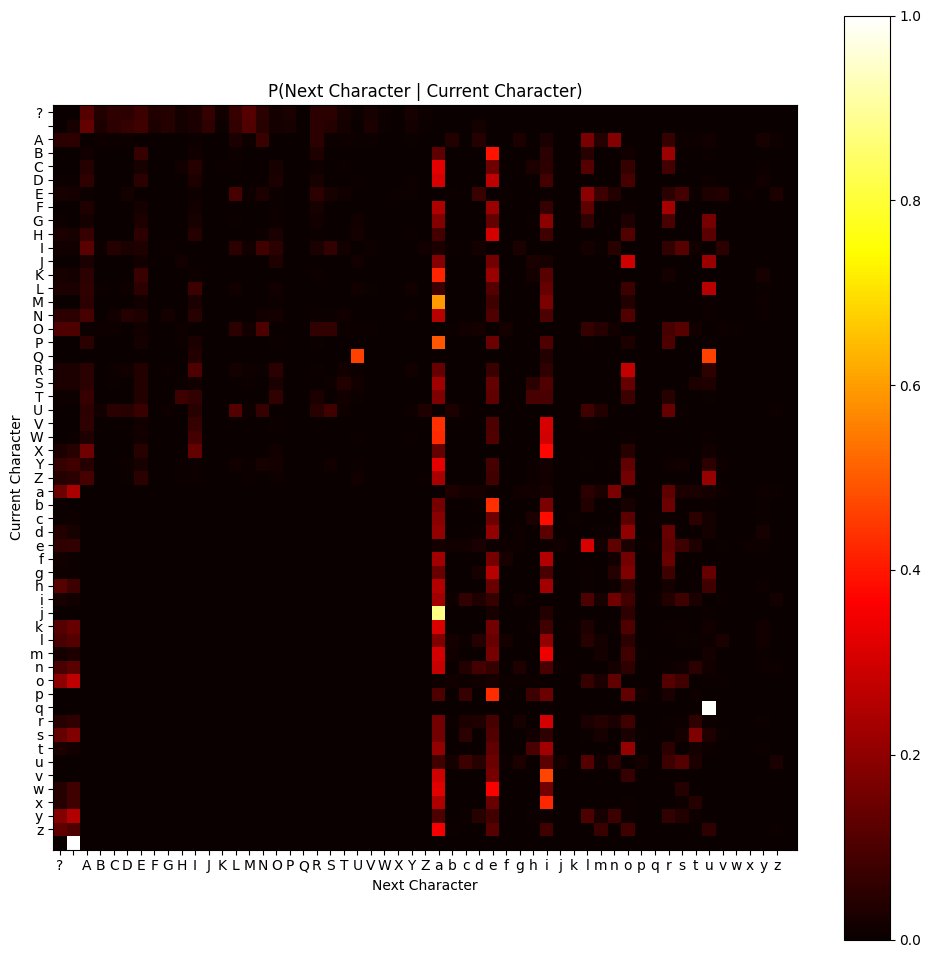

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
plt.imshow(P.numpy(), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('P(Next Character | Current Character)')
plt.xlabel('Next Character')
plt.ylabel('Current Character')
plt.xticks(range(len(chars)), [itos[i] for i in range(len(chars))])
plt.yticks(range(len(chars)), [itos[i] for i in range(len(chars))])
plt.show()

In [4]:
g = torch.Generator().manual_seed(42)

# Generate n names
for i in range(20):
    out = []
    ix = 0
    while True:
        p = N[ix].float()
        p /= p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item() # Generate the next character
        out.append(itos[ix])
        if ix == 0:
            break
    print("".join(out[:-1]))

Lelia Ghonevinarahiara
MEdena
Sccistariavis Ala Os IN Da Anian Mos
Fasmi Nanarthro
Na Mamboramilldaritatino
Olifa Watxelvin Ena
Aiela
LIguelauidalbeleliefa COri Miostana Ma ARO Jerd
Do Lisa Ay HEvi Dauega Juabanstarin
Mamydo
LAmiorense
O Besmsana Waciauicietha
SAmma Esarcanti ROEmeli
So I
Manel IOLaminancinarnalo Cheli El
La Ma Anitia BRELes Minavoririarccia
OYamen Maune
Aylie
Roavena Fardalaro Maconthilyrarl Ma
Dalona Ce


In [5]:
log_likelihood = 0.0
c = 0
for n in names:
    chs = ["?"] + list(n) + ["?"]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        c += 1

nll = -log_likelihood
print(f"{nll/c:.2f} bits per character")

2.40 bits per character
